In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math

#these are the cleanest versions of our data sets
m_df = pd.read_csv("desktop/IMDb_finalized.csv")

m_combine_fd = pd.read_csv("desktop/financials_w_IMDb_fin.csv")

m_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0
3,tt0002101,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0
4,tt0002130,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0


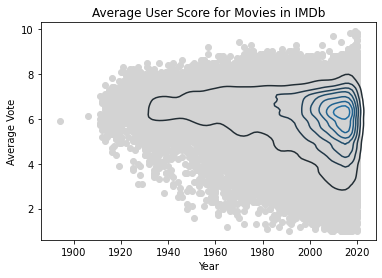

In [4]:
#This is our set of figures for looking at movie scores and votes by year
#Plotting year by average vote in a scatter plot
#this rendering uses a contour polt from the seaborn module, which seems kind of computationally expensive
#the contours show where most of the points are

plt.scatter(m_df['year'], m_df['avg_vote'], facecolors = "lightgrey")
sns.kdeplot(m_df['year'], m_df['avg_vote'])
plt.xlabel("Year")
plt.ylabel("Average Vote")
plt.title('Average User Score for Movies in IMDb')

#plt.savefig("desktop/movie_figures/av_scores_by_year.png")
plt.show()

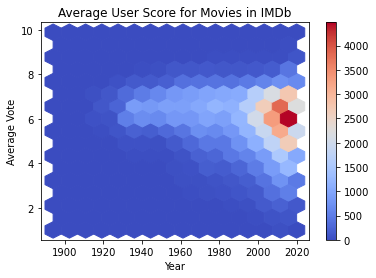

In [5]:
#this is a hexbin plot to clarify the very dense scatter plot
#cmap is for colormap, this is a scheme that dictates how the density is shown
#sharex = False makes it so the x labels show up

m_df.plot.hexbin(x = 'year', y = 'avg_vote', gridsize = 15, cmap = 'coolwarm', sharex = False)
plt.xlabel("Year")
plt.ylabel("Average Vote")
plt.title('Average User Score for Movies in IMDb')

#plt.savefig("desktop/movie_figures/av_scores_by_year_hex.png")
plt.show()

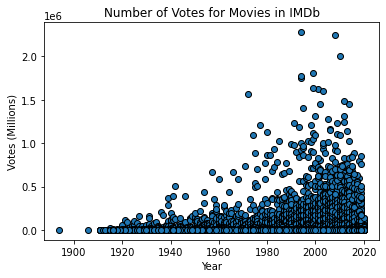

In [6]:
#this is just a scatter plot for votes by year
#its good for identifying outliers with respect to engagement
plt.scatter(m_df['year'], m_df['votes'], edgecolors = "black")
plt.xlabel("Year")
plt.ylabel("Votes (Millions)")
plt.title('Number of Votes for Movies in IMDb')
#plt.savefig("desktop/movie_figures/Votes_by_year.png")
plt.show()

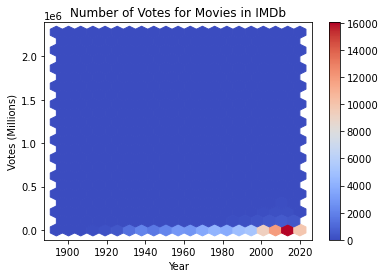

In [7]:
#A hexbin plot can show that most of the points in the scatter above are smashed into the x axis

m_df.plot.hexbin(x = 'year', y = 'votes', gridsize = 20, cmap = 'coolwarm', sharex = False)
plt.xlabel("Year")
plt.ylabel("Votes (Millions)")
plt.title('Number of Votes for Movies in IMDb')
plt.savefig("desktop/movie_figures/Votes_by_year_hex.png")
plt.show()

In [28]:
#Which movies are the outliers on the scatter plot two cells back?

v_df = m_df.sort_values(by = "votes", ascending = False)

v_df.head(25)

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
28453,tt0111161,Le ali della libertà,1994,2/10/1995,Drama,142,USA,English,Frank Darabont,9.3,2278845,8232.0,164.0
48078,tt0468569,Il cavaliere oscuro,2008,7/23/2008,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,9.0,2241615,6938.0,423.0
57475,tt1375666,Inception,2010,9/24/2010,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,8.8,2002816,3927.0,473.0
32487,tt0137523,Fight Club,1999,10/29/1999,Drama,139,"USA, Germany",English,David Fincher,8.8,1807440,3758.0,370.0
28381,tt0110912,Pulp Fiction,1994,10/28/1994,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,8.9,1780147,3058.0,289.0
28066,tt0109830,Forrest Gump,1994,10/6/1994,"Drama, Romance",142,USA,English,Robert Zemeckis,8.8,1755490,2416.0,169.0
32229,tt0133093,Matrix,1999,5/7/1999,"Action, Sci-Fi",136,USA,English,"Lana Wachowski, Lilly Wachowski",8.7,1632315,4310.0,342.0
31279,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,2001,1/18/2002,"Action, Adventure, Drama",178,"New Zealand, USA","English, Sindarin",Peter Jackson,8.8,1619920,5392.0,340.0
34127,tt0167260,Il Signore degli Anelli - Il ritorno del re,2003,1/22/2004,"Action, Adventure, Drama",201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,8.9,1604280,3718.0,353.0
15528,tt0068646,Il padrino,1972,9/21/1972,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,9.2,1572674,3977.0,253.0


In [8]:
#Average Score By Genre Analysis
# This is a table of the most abundant genres and some basic descriptive stats

g_avg_vote_df = m_df[['genre', 'avg_vote']].copy()

gen_vote_stats = g_avg_vote_df.groupby('genre').agg(
    mean = pd.NamedAgg(column = 'avg_vote', aggfunc = 'mean'),
    median = pd.NamedAgg(column = 'avg_vote', aggfunc = 'median'),
    standard_deviation = pd.NamedAgg(column = 'avg_vote', aggfunc = 'std'),
    movie_count= pd.NamedAgg(column = 'avg_vote', aggfunc = 'count')
)

gvs_counts = gen_vote_stats.sort_values(by = ["movie_count"], ascending = False)

gvs_counts.head(25)

gvs_mc = gvs_counts.head(25).copy()

gvs_mc

,mean,median,standard_deviation,movie_count
genre,,,,
Drama,6.357076,6.50,0.964083,12543
Comedy,5.604745,5.80,1.219596,7693
"Comedy, Drama",6.253033,6.40,0.987685,4039
"Drama, Romance",6.338726,6.50,0.954476,3455
"Comedy, Romance",5.888278,6.00,0.999580,2508
"Comedy, Drama, Romance",6.202922,6.30,0.971382,2293
Horror,4.386199,4.40,1.277780,2268
"Drama, Thriller",5.813353,5.90,1.111070,1348
"Crime, Drama",6.261579,6.40,1.033780,1343


In [9]:
#Genres Anova
#We are doing hypothesis testing to see if the means for single designation genres are different by chance
#setting dfs of movies by single component genre and average vote

#defining dataframes that contain only average vote for a single genre
horror_df = m_df[m_df['genre']=="Horror"]['avg_vote']
drama_df = m_df[m_df['genre']=="Drama"]['avg_vote']
comedy_df = m_df[m_df['genre']=="Comedy"]['avg_vote']
action_df = m_df[m_df['genre']=="Action"]['avg_vote']
western_df = m_df[m_df['genre']=="Western"]['avg_vote']
thriller_df = m_df[m_df['genre']=="Thriller"]['avg_vote']
romance_df = m_df[m_df['genre']=="Romance"]['avg_vote']


#Scipy one way ANOVA
st.f_oneway(horror_df, drama_df, comedy_df, action_df, western_df, thriller_df, romance_df)

F_onewayResult(statistic=1338.7481140365946, pvalue=0.0)

In [10]:
#Welch's t-test between horror and drama
#Welch's is important because these are independant groups
#and their variences are not the same

st.ttest_ind(horror_df, drama_df, equal_var = False)

Ttest_indResult(statistic=-69.94395887619143, pvalue=0.0)

In [11]:
#Same test with comedy and drama - two of the clser 
st.ttest_ind(comedy_df, drama_df, equal_var = False)

Ttest_indResult(statistic=-46.00332937041193, pvalue=0.0)

In [12]:
#retry the ANOVA with numpy arrays
#convert dfs to numpy arrays (this can work because its a df with one column)
#This is being done, becuase the pvalue is very low, and we need to confirm that the result is not a computational artifact

#converting dfs to numpy arrays
horror_n = horror_df.to_numpy()
drama_n = drama_df.to_numpy()
comedy_n = comedy_df.to_numpy()
action_n = action_df.to_numpy()
western_n = western_df.to_numpy()
thriller_n = thriller_df.to_numpy()
romance_n = romance_df.to_numpy()

st.f_oneway(horror_df, drama_df, comedy_df, action_df, western_df, thriller_df, romance_df)

F_onewayResult(statistic=1338.7481140365946, pvalue=0.0)

In [13]:
#I built a Welches t-test from scratch and calculated the t statistic and degrees of freedom
#this is another test to make sure the pvalues are not bugged
#note: the t statistic seems to be quite high, and the degrees of freedom seem quite high. 
#I think this is because of large sample size, rather than a mathematical error. 

#s values
com_s = comedy_n.std()
dram_s = drama_n.std()

#n values
ncom = len(comedy_n)
ndram = len(drama_n)

#s sub delta calculation

sdelt = math.sqrt((com_s**2)/ncom + (dram_s**2)/ndram)

#t statistic calculation
dct = (comedy_n.mean() - drama_n.mean())/sdelt

print(f'The t value is {dct}')

#degrees of freedom calculation
dcdf_num = ((com_s**2)/ncom + (dram_s**2)/ndram)**2

dcdf_denom1 = (com_s**4)/((ncom**2)*(ncom - 1))

dcdf_denom2 = (dram_s**4)/((ndram**2)*(ndram - 1))

dcdf = dcdf_num/(dcdf_denom1 + dcdf_denom2)

print(f'There are {dcdf} degrees of freedom')

#note - the t statistic matches the one above to three significant figures

The t value is -46.00599922464367
There are 13501.852717714515 degrees of freedom


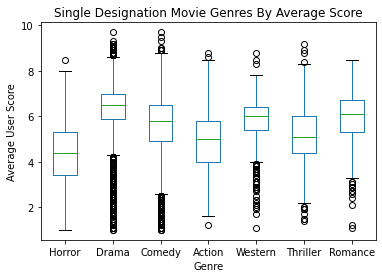

In [16]:
#boxplot for single designation movie genres

#knitting the genre dataframes together into a df for plotting with pandas
genre_plot = {
    "Horror":horror_df, "Drama": drama_df, "Comedy": comedy_df,
    "Action":action_df, "Western":western_df, "Thriller": thriller_df, 
    "Romance": romance_df
}

gp_df = pd.DataFrame(data = genre_plot)

#code for the plot
boxplot = gp_df.boxplot(grid = False)

plt.title('Single Designation Movie Genres By Average Score')
plt.ylabel('Average User Score')
plt.xlabel('Genre')

#plt.savefig("desktop/movie_figures/Votes_by_genre.png")
plt.show()

Text(0.5, 0, 'Average User Score')

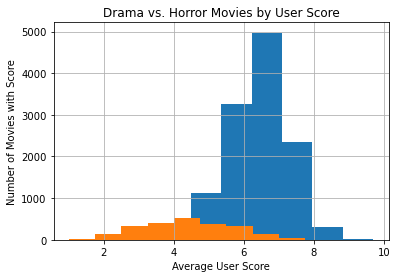

In [17]:
#histograms of horror and drama movie scores
drama_df.hist()
horror_df.hist()
plt.title('Drama vs. Horror Movies by User Score')
plt.ylabel('Number of Movies with Score')
plt.xlabel('Average User Score')

#plt.savefig("desktop/movie_figures/HvsD.png")

In [22]:
#financials analysis - descriptive stats

m_combine_fd.describe()

,Year,Opening,Budget,duration,avg_vote,votes,reviews_from_users,reviews_from_critics
count,304.000000,3.040000e+02,3.040000e+02,304.000000,304.000000,3.040000e+02,304.000000,304.000000
mean,2007.171053,1.184722e+08,9.276217e+07,116.802632,6.664803,3.149994e+05,992.049342,297.226974
std,7.493254,4.799676e+07,6.662899e+07,19.890970,0.950028,2.846870e+05,1121.576937,178.619877
min,1983.000000,4.825606e+07,3.000000e+06,81.000000,2.400000,9.071000e+03,35.000000,16.000000
25%,2002.000000,8.222551e+07,4.200000e+07,103.000000,6.100000,1.190128e+05,376.000000,153.000000
50%,2008.000000,1.110154e+08,7.500000e+07,115.000000,6.700000,2.400595e+05,654.500000,247.500000
75%,2013.000000,1.419442e+08,1.375000e+08,129.000000,7.300000,4.142005e+05,1300.750000,416.000000
max,2020.000000,3.964699e+08,3.560000e+08,194.000000,8.800000,2.002816e+06,10472.000000,813.000000


In [23]:
#calculating the median budget for reference
med_bud = m_combine_fd[["Budget"]].copy()

med_b = med_bud.median()

print(f'The median number of buget in the combined set is {med_b}')

The median number of buget in the combined set is Budget    75000000.0
dtype: float64


The correlation is 0.28373290387529404


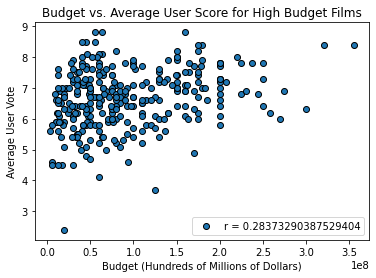

In [20]:
#financials analysis - scatter plots and Pearson r values
#scatter plot to look for correlation between budget and user rating
r_val = st.pearsonr(m_combine_fd['Budget'], m_combine_fd['avg_vote'])

plt.scatter(m_combine_fd['Budget'], m_combine_fd['avg_vote'], edgecolors = "black", label = f'r = {r_val[0]}')
plt.ylabel('Average User Vote')
plt.xlabel('Budget (Hundreds of Millions of Dollars)')
plt.title('Budget vs. Average User Score for High Budget Films')
plt.legend()


print(f'The correlation is {r_val[0]}')
#plt.savefig("desktop/movie_figures/BvsAve.png")
plt.show()

The correlation is 0.2749623813539261


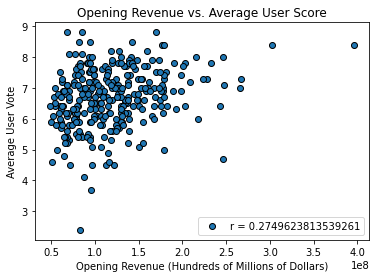

In [24]:
#scatter plot to look at opening revenue vs vote counts 
r_val2 = st.pearsonr(m_combine_fd['Opening '], m_combine_fd['avg_vote'])

plt.scatter(m_combine_fd['Opening '], m_combine_fd['avg_vote'], edgecolors = "black", label = f'r = {r_val2[0]}')
plt.ylabel('Average User Vote')
plt.xlabel('Opening Revenue (Hundreds of Millions of Dollars)')
plt.title('Opening Revenue vs. Average User Score')
plt.legend()
#plt.savefig("desktop/movie_figures/Votes_by_opening.png")



print(f'The correlation is {r_val2[0]}')

plt.show()

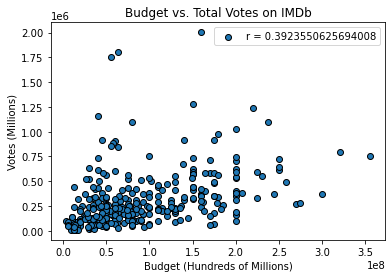

The correlation is 0.3923550625694008


In [25]:
#plot to look at vote counts and budget
r_val3 = st.pearsonr(m_combine_fd['Budget'], m_combine_fd['votes'])

plt.scatter(m_combine_fd['Budget'], m_combine_fd['votes'], edgecolors = "black", label = f'r = {r_val3[0]}')
plt.ylabel('Votes (Millions)')
plt.xlabel('Budget (Hundreds of Millions)')
plt.title("Budget vs. Total Votes on IMDb")
plt.legend()
#plt.savefig("desktop/movie_figures/totVotes_vs_budg.png")

plt.show()


print(f'The correlation is {r_val3[0]}')

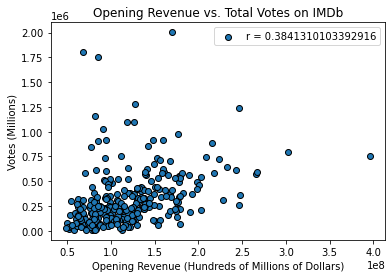

The correlation is 0.3841310103392916


In [26]:
#same as above but for opening revenue and votes
r_val4 = st.pearsonr(m_combine_fd['Opening '], m_combine_fd['votes'])

plt.scatter(m_combine_fd['Opening '], m_combine_fd['votes'], edgecolors = "black", label = f'r = {r_val4[0]}')
plt.ylabel('Votes (Millions)')
plt.xlabel('Opening Revenue (Hundreds of Millions of Dollars)')
plt.title('Opening Revenue vs. Total Votes on IMDb')
plt.legend()
#plt.savefig("desktop/movie_figures/totvotes_vs_open.png")
plt.show()

r_val4 = st.pearsonr(m_combine_fd['Opening '], m_combine_fd['votes'])

print(f'The correlation is {r_val4[0]}')